# Inferencia Sugeno - Gradiente Descendente
Utilizando o metodo do gradiente descendente para aproximar a saída para f(x)=x^2

## Autores
Renan Mateus Bernado do Nascimento
<br>Nícolas Arruda Maduro

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [74]:
class IpsilonFunc:
    
    def __init__(self, p, q):
        self.p = p
        self.q = q
        
    def out(self, x):
        return self.p*x + self.q

In [78]:
def plotGraph(xValues, yValues,title,ylabel,xlabel,name1,name2):
    if name2=="":
        plt.plot(yValues, label=name1)
    else:
        plt.plot(xValues,yValues[0],label=name1)
        plt.plot(xValues,yValues[1],label=name2)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.legend()
    plt.show()

In [125]:
class GradientDescent:
    
    def __init__(self, func, domain, input_size, learning_rate, yRange, iteration,inputs_type):
        self.func = func
        self.domain = domain
        self.input_size = input_size
        self.learning_rate = learning_rate
        self.y1 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.y2 = IpsilonFunc(random.uniform(yRange[0], yRange[1]), random.uniform(yRange[0], yRange[1]))
        self.input = []
        self.output = []
        self.predOutput = []
        self.iteration = iteration
        self.error_iteration = []
        self.inputs_type=inputs_type
    
    def squareFunc(self, x):
        return x**2
    
    def pertinenceFunc1(self, x):
        if (self.inputs_type=="retas"):
            return -0.25*x+0.5
        elif (self.inputs_type=="guassianas"):
            sigma =1.414213562373095
            m=-2
            return np.exp(-(0.5)*pow((x-m)/sigma, 2))
    
    def pertinenceFunc2(self, x):
        if (self.inputs_type=="retas"):
            return 0.25*x+0.5
        elif (self.inputs_type=="guassianas"):
            sigma =1.414213562373095
            m=2
            return np.exp(-(0.5)*pow((x-m)/sigma, 2))
    
    ''' Initiates input randomly '''
    def initInput(self):
        self.input = [ random.uniform(domain[0], domain[1]) for i in range(0, self.input_size) ]
        self.input.sort()
        self.calcOutput()
            
    ''' Calculates output '''
    def calcOutput(self):
        self.output = [ self.squareFunc(x) for x in self.input ]
        
        
    ''' Calculates predicted output '''
    def calcPredictedOutput(self, x):
        num = self.y1.out(x)*self.pertinenceFunc1(x) + self.y2.out(x)*self.pertinenceFunc2(x)
        den = self.pertinenceFunc1(x)+self.pertinenceFunc2(x)
        return num/den
    
    
    def calcError(self, yd, yPred):
        return 0.5*pow((yPred -yd), 2)
    
    
    ''' Partial derivative Error -> p '''
    def pDErrorP(self, yd, yPred, w, w1, w2, x):
        return (yPred -yd)*(w/(w1+w2))*x
    
    
    ''' Partial derivative Error -> q '''
    def pDErrorQ(self, yd, yPred, w, w1, w2):
        return (yPred -yd)*(w/(w1+w2))
    
    
    def run(self):        
        for i in range(0, iteration):
            self.initInput()
            error = []
            pDErrorP_y1 = []
            pDErrorP_y2 = []
            pDErrorQ_y1 = []
            pDErrorQ_y2 = []
            
            for i in range(0, self.input_size):
                yPred = self.calcPredictedOutput(self.input[i])
                error.append(self.calcError(self.output[i], yPred))
                pDErrorP_y1=self.pDErrorP(self.output[i], yPred, self.pertinenceFunc1(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]), self.input[i])
                pDErrorP_y2=self.pDErrorP(self.output[i], yPred, self.pertinenceFunc2(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]), self.input[i])
                pDErrorQ_y1=self.pDErrorQ(self.output[i], yPred, self.pertinenceFunc1(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]))
                pDErrorQ_y2=self.pDErrorQ(self.output[i], yPred, self.pertinenceFunc2(self.input[i]), self.pertinenceFunc1(self.input[i]), self.pertinenceFunc2(self.input[i]))
                
                self.y1.p = self.y1.p - self.learning_rate*pDErrorP_y1
                self.y2.p = self.y2.p - self.learning_rate*pDErrorP_y2
                self.y1.q = self.y1.q - self.learning_rate*pDErrorQ_y1
                self.y2.q = self.y2.q - self.learning_rate*pDErrorQ_y2
                
            
            self.error_iteration.append(sum(error))
            
        self.initInput()
        yPred=[]
        for i in range(0, self.input_size):
            yPred.append(self.calcPredictedOutput(self.input[i]))
        for i in 
        plotGraph(self.input, [self.output,yPred],"Gráfico comparativo de y e yd, tendo como entrada duas "+self.inputs_type, "y","x","f(x)","Valores preditos")
        plotGraph([], self.error_iteration,"Grafíco do Erro, tendo como entrada duas retas "+self.inputs_type,"","Iterações","Erro","")

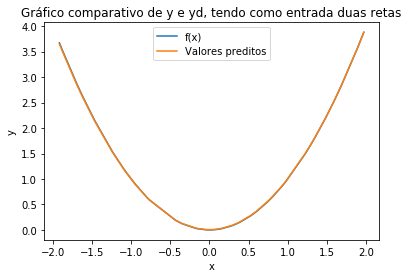

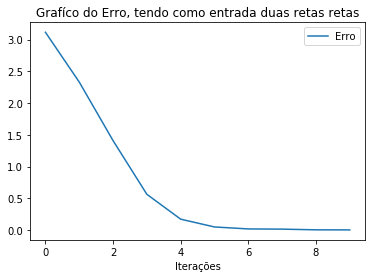

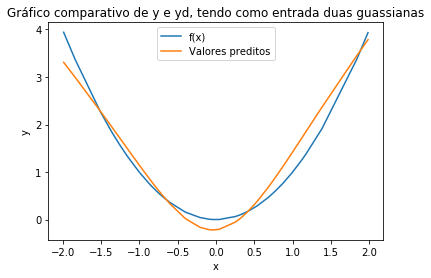

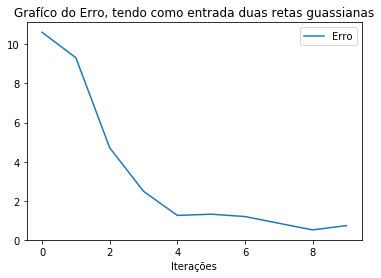

In [133]:
func = 'line'
domain = (-2, 2)
input_size = 50
learning_rate = 0.1
yRange = (-2, 2)
iteration = 10

gdRetas = GradientDescent(func, domain, input_size, learning_rate, yRange, iteration,"retas")
gdRetas.run()

gdGuassianas = GradientDescent(func, domain, input_size, learning_rate, yRange, iteration,"guassianas")
gdGuassianas.run()

## Resultados
<p>
Como era esperado, ao utilizar duas retas como funções de pertinência, a predição é extremamente precisa. Em contraponto, ao utilizar duas gaussianas como funçoes de pertinência, a predição não é precisa.
</p>
<p>
Foi utiliza a atualização de <em>p</em> e <em>q</em> a cada valor de entrada, pois o resultado de se atualizá-los a cada iteração não foi tão bom como o usado.
</p>
<p>
Estavamos somando as derivadas parciais do erro em relação a cada <em>p</em> e <em>q</em> de todas as entradas. Porém, como as derivadas podem ser positivas ou negativas, o somátorio não representa um valor aceitável da variação. Portanto, não produz uma boa predição. 
</p>

